In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

train = pd.read_csv('/content/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

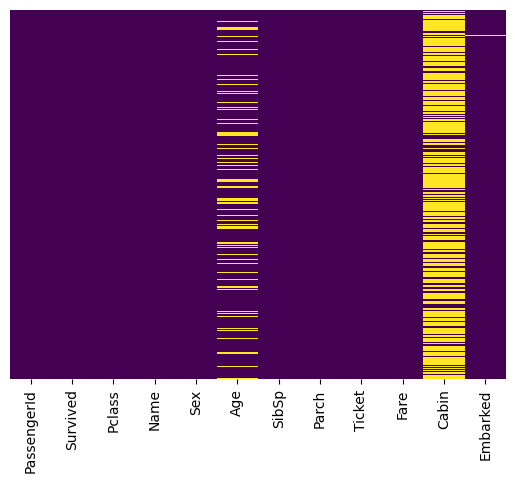

In [2]:
# showing the columns with null value in yellow color
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Survived', ylabel='count'>

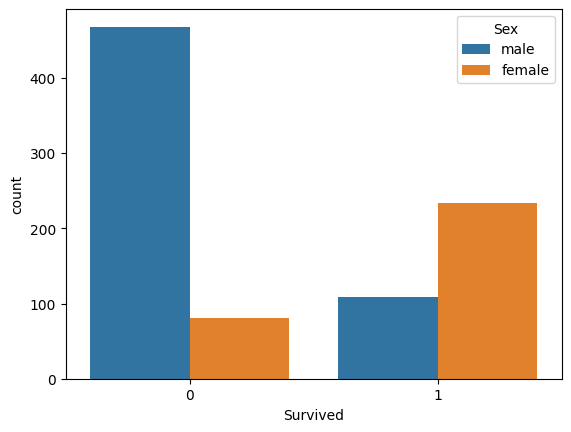

In [3]:
sns.countplot(x='Survived', data=train, hue='Sex')

<Axes: xlabel='Pclass', ylabel='Age'>

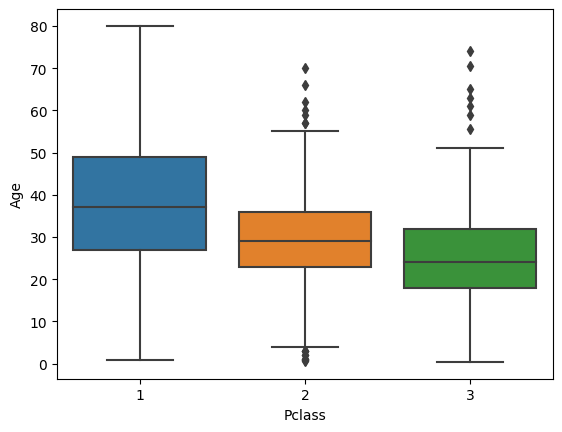

In [4]:
# plotting age of passengers based on different class to impute average of each pclass accordingly
sns.boxplot(x='Pclass', y='Age', data=train)


In [5]:

# data cleaning
# filling empty age field value with average according to pclasses
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age


train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)
train.drop('Cabin', axis=1, inplace=True)

<Axes: >

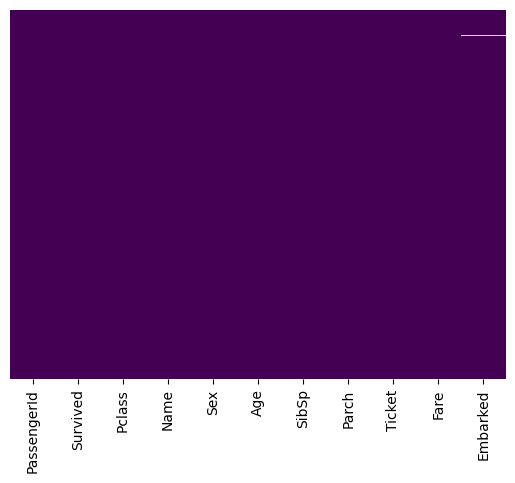

In [6]:
# checking if some field have empty value
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [7]:
# getting dummy variables
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [8]:
# deleting unwanted field to remove model complexity
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)

In [9]:
y = train['Survived']
X = train.drop('Survived', axis=1)

# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# creating model
logmodel = LogisticRegression()
# training model
logmodel.fit(X_train, y_train)

LogisticRegression()

In [10]:
# predicting values
predictions = logmodel.predict(X_test)

# checking accuracy with confusion matrix which is used to evaluate classificaton model
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[133  21]
 [ 60  54]]


In [11]:
# classification report
c_report = classification_report(y_test, predictions)
print(c_report)

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.47      0.57       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.68       268

